In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1- Loading Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Up School/Capstone/ecommerce-data.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


# 2- Data Cleaning

In [ ]:
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

34

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [ ]:
null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)

,null_val,percent_
merchant_profile_picture,1314,85.0
has_urgency_banner,1071,70.0
urgency_text,1071,70.0
rating_two_count,43,3.0
product_color,41,3.0
rating_five_count,43,3.0
rating_four_count,43,3.0
rating_three_count,43,3.0
rating_one_count,43,3.0
origin_country,16,1.0


In [ ]:
df[df['urgency_text'].isnull()== False]['urgency_text'].unique()

array(['Quantité limitée !', 'Réduction sur les achats en gros'],
      dtype=object)

In [ ]:
df[df['merchant_profile_picture'].isnull()== False]['merchant_profile_picture'][:5,]

6     https://s3-us-west-1.amazonaws.com/sweeper-pro...
21    https://s3-us-west-1.amazonaws.com/sweeper-pro...
30    https://s3-us-west-1.amazonaws.com/sweeper-pro...
39    https://s3-us-west-1.amazonaws.com/sweeper-pro...
47    https://s3-us-west-1.amazonaws.com/sweeper-pro...
Name: merchant_profile_picture, dtype: object

In [ ]:
df[(df['has_urgency_banner'].isnull()== False) & (df['has_urgency_banner'] == 1.0)]['has_urgency_banner']

0       1.0
1       1.0
2       1.0
4       1.0
8       1.0
       ... 
1558    1.0
1561    1.0
1564    1.0
1565    1.0
1569    1.0
Name: has_urgency_banner, Length: 468, dtype: float64

In [ ]:
df[(df['has_urgency_banner'].isnull()== False) & (df['has_urgency_banner'] == 1.0)]['has_urgency_banner'].unique()

array([1.])

We saw that all values that is not null are 1. So, there is a possibility that the products with no urgency banner is labeled as None.

In [ ]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [ ]:
df[df['product_variation_size_id'].isnull()].index.tolist()

[44, 116, 338, 404, 584, 637, 726, 856, 954, 1179, 1296, 1385, 1440, 1474]

In [ ]:
df[df['origin_country'].isnull()].index.tolist()

[56,
 180,
 498,
 507,
 547,
 632,
 679,
 802,
 921,
 943,
 1059,
 1147,
 1244,
 1256,
 1289,
 1296]

In [ ]:
df[df['merchant_name'].isnull()].index.tolist()

[408, 1103, 1350]

In [ ]:
df[df['merchant_info_subtitle'].isnull()].index.tolist()

[438]

In [ ]:
df[df['rating_five_count'].isnull()].index.tolist() == df[df['rating_four_count'].isnull()].index.tolist()

True

In [ ]:
df[df['rating_four_count'].isnull()].index.tolist() == df[df['rating_three_count'].isnull()].index.tolist()

True

In [ ]:
df[df['rating_three_count'].isnull()].index.tolist() == df[df['rating_two_count'].isnull()].index.tolist()

True

In [ ]:
df[df['rating_two_count'].isnull()].index.tolist() == df[df['rating_one_count'].isnull()].index.tolist()

True

# 3- Data Preprocessing

3.1. Size variation

In [ ]:
pr_var = df['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               630
XS              344
M               198
XXS              94
L                49
XL               17
S.               16
XXL              15
XXXS              6
s                 5
4XL               5
XS.               5
Size S            5
M.                4
Size-XS           4
SIZE XS           4
2XL               4
33                3
10 ml             3
SizeL             3
2pcs              3
Size-S            3
34                3
Size M            2
Suit-S            2
1 pc.             2
5XL               2
XXXXXL            2
Size4XL           2
SIZE-XXS          2
3XL               2
35                2
S(bust 88cm)      2
Size -XXS         2
1                 2
One Size          2
size S            2
Size S.           2
29                2
S Pink            2
XXXXL             2
EU 35             2
Name: product_variation_size_id, dtype: int64

In [ ]:
pr_var[pr_var == 1]

100 cm               1
17                   1
Women Size 37        1
S/M(child)           1
20pcs                1
                    ..
Size-5XL             1
SIZE-4XL             1
04-3XL               1
30 cm                1
first  generation    1
Name: product_variation_size_id, Length: 64, dtype: int64

In [ ]:
# XXS
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size -XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XXS', 'XXS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XXS', 'XXS')

# XS
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XS.', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-XS', 'XS')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE XS', 'XS')

# S
df['product_variation_size_id'] = df['product_variation_size_id'].replace('S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('size S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size S.', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('s', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size/S', 'S')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size--S ', 'S')

# M
df['product_variation_size_id'] = df['product_variation_size_id'].replace('M.', 'M')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size M', 'M')

# L
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SizeL', 'L')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('L.', 'L')

# XXL
df['product_variation_size_id'] = df['product_variation_size_id'].replace('2XL', 'XXL')

# Plus size
df['product_variation_size_id'] = df['product_variation_size_id'].replace('4XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size4XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('5XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXXXL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('Size-5XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXXL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('SIZE-4XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('6XL', '3XL<=')
df['product_variation_size_id'] = df['product_variation_size_id'].replace('XXXL', '3XL<=')

In [ ]:
pr_var = df['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               665
XS              357
M               204
XXS              99
L                53
XXL              19
XL               17
3XL<=            17
XXXS              6
34                3
33                3
10 ml             3
2pcs              3
S(bust 88cm)      2
One Size          2
1                 2
1 pc.             2
Suit-S            2
EU 35             2
35                2
29                2
S Pink            2
3XL               2
Name: product_variation_size_id, dtype: int64

In [ ]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == '3XL <=':
        return name
    else:
        return "OTHER"
    
df['product_variation_size_id'] = df['product_variation_size_id'].replace(np.nan, 'OTHER')
df['product_variation_size_id'] = df['product_variation_size_id'].apply(pr_var)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


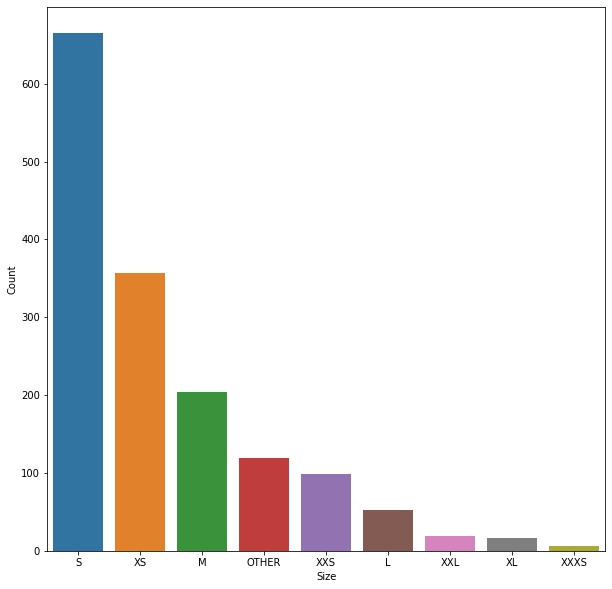

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = df['product_variation_size_id'].value_counts().index,
              data = df,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

Hazır giyim sektörüne baktığımızda 44-XXL sonrası büyük beden olarak nitelendiriliyor. Ortalama insan bedenlerine bak esp for French and American people

3.2. Color variation

In [ ]:
pr_colr = df['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               298
white               246
yellow              101
pink                 97
blue                 96
red                  92
green                86
grey                 70
purple               53
armygreen            31
winered              27
navyblue             27
orange               27
multicolor           20
beige                14
khaki                12
lightblue            12
gray                 10
white & green        10
skyblue               8
rosered               8
brown                 7
darkblue              6
coffee                6
rose                  5
floral                5
leopard               4
lightpink             4
black & green         4
orange-red            3
lightgreen            3
fluorescentgreen      3
camouflage            3
black & white         3
navy                  3
Black                 3
White                 3
Name: product_color, dtype: int64

In [ ]:
pr_colr[pr_colr == 2]

navy blue         2
pink & blue       2
white & black     2
watermelonred     2
lakeblue          2
Army green        2
silver            2
pink & white      2
coolblack         2
applegreen        2
pink & black      2
mintgreen         2
burgundy          2
black & blue      2
wine              2
pink & grey       2
apricot           2
lightred          2
dustypink         2
black & yellow    2
Pink              2
lightyellow       2
camel             2
whitefloral       2
Name: product_color, dtype: int64

In [ ]:
pr_colr[pr_colr == 1]

army                   1
blue & pink            1
light green            1
gold                   1
army green             1
navyblue & white       1
rosegold               1
orange & camouflage    1
rainbow                1
offblack               1
wine red               1
black & stripe         1
red & blue             1
blackwhite             1
winered & yellow       1
lightpurple            1
ivory                  1
offwhite               1
lightgrey              1
gray & white           1
jasper                 1
RED                    1
white & red            1
lightgray              1
coralred               1
Blue                   1
whitestripe            1
Rose red               1
prussianblue           1
nude                   1
claret                 1
greysnakeskinprint     1
tan                    1
leopardprint           1
denimblue              1
star                   1
darkgreen              1
lightkhaki             1
brown & yellow         1
violet                 1


In [ ]:
df['product_color'] = df['product_color'].replace('Black', 'black')
df['product_color'] = df['product_color'].replace('White', 'white')

df['product_color'] = df['product_color'].replace('navyblue', 'blue')
df['product_color'] = df['product_color'].replace('lightblue', 'blue')
df['product_color'] = df['product_color'].replace('skyblue', 'blue')
df['product_color'] = df['product_color'].replace('darkblue', 'blue')
df['product_color'] = df['product_color'].replace('navy', 'blue')

df['product_color'] = df['product_color'].replace('winered', 'red')
df['product_color'] = df['product_color'].replace('rosered', 'red')
df['product_color'] = df['product_color'].replace('rose', 'red')
df['product_color'] = df['product_color'].replace('RED', 'red')
df['product_color'] = df['product_color'].replace('Rose red', 'red')
df['product_color'] = df['product_color'].replace('wine red', 'red')

df['product_color'] = df['product_color'].replace('lightpink', 'pink')

df['product_color'] = df['product_color'].replace('armygreen', 'green')
df['product_color'] = df['product_color'].replace('khaki', 'green')
df['product_color'] = df['product_color'].replace('lightgreen', 'green')
df['product_color'] = df['product_color'].replace('fluorescentgreen', 'green')

df['product_color'] = df['product_color'].replace('gray', 'grey')

df['product_color'] = df['product_color'].replace('coffee', 'brown')

df['product_color'] = df['product_color'].replace('white & green', 'dual')
df['product_color'] = df['product_color'].replace('black & green', 'dual')
df['product_color'] = df['product_color'].replace('black & white', 'dual')
df['product_color'] = df['product_color'].replace('pink & white', 'dual')
df['product_color'] = df['product_color'].replace('pink & grey', 'dual')
df['product_color'] = df['product_color'].replace('black & yellow', 'dual')
df['product_color'] = df['product_color'].replace('pink & blue', 'dual')
df['product_color'] = df['product_color'].replace('black & blue', 'dual')
df['product_color'] = df['product_color'].replace('white & black', 'dual')
df['product_color'] = df['product_color'].replace('pink & black', 'dual')
df['product_color'] = df['product_color'].replace('brown & yellow', 'dual')
df['product_color'] = df['product_color'].replace('gray & white', 'dual')
df['product_color'] = df['product_color'].replace('winered & yellow', 'dual')
df['product_color'] = df['product_color'].replace('navyblue & white', 'dual')
df['product_color'] = df['product_color'].replace('red & blue', 'dual')
df['product_color'] = df['product_color'].replace('blue & pink', 'dual')
df['product_color'] = df['product_color'].replace('white & red', 'dual')

In [ ]:
pr_colr = df['product_color'].value_counts()
pr_colr[pr_colr > 2]

black         301
white         249
blue          152
red           135
green         135
yellow        101
pink          101
grey           80
purple         53
dual           38
orange         27
multicolor     20
beige          14
brown          13
floral          5
leopard         4
camouflage      3
orange-red      3
Name: product_color, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


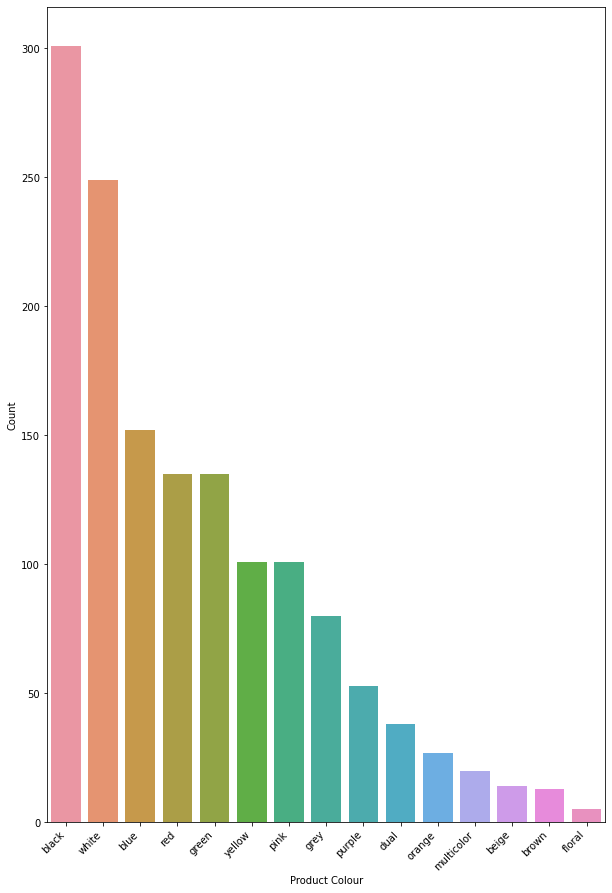

In [ ]:
# Show Most popular colors
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = df,
              order = df['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['shipping_option_name'].unique()

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka'], dtype=object)

In [ ]:
df.groupby('shipping_option_name')['units_sold'].sum()

shipping_option_name
Ekspresowa wysyłka           10000
Envio Padrão                 22400
Envío normal                 16100
Expediere Standard            2400
Livraison Express             1200
Livraison standard         6591647
Spedizione standard           1100
Standard Shipping            88550
Standardowa wysyłka          30100
Standardversand                300
Standart Gönderi             11000
Стандартная доставка         10100
الشحن القياسي                 1300
การส่งสินค้ามาตรฐาน          10000
ការដឹកជញ្ជូនតាមស្តង់ដារ      10000
Name: units_sold, dtype: int64

In [ ]:
df['origin_country'].unique()

array(['CN', 'US', nan, 'VE', 'AT', 'SG', 'GB'], dtype=object)

# 4- SQL Queries

In [ ]:
import sqlite3

conn = sqlite3.connect(":memory:")

In [ ]:
df.to_sql("df",  conn, if_exists="replace")

In [ ]:
chart = pd.read_sql(
    """
    SELECT title, price ||' '|| currency_buyer as price, rating, SUM(rating_five_count), units_sold
    FROM df
    WHERE price > 
    (SELECT AVG(price)
     FROM df)
    GROUP BY product_id
    ORDER BY units_sold DESC
    """
    ,conn)

chart.head()

,title,price,rating,SUM(rating_five_count),units_sold
0,Sexy Women Casual T-shirt rayé Long Tops Chemi...,9.0 EUR,4.26,3111.0,50000
1,Femmes dentelle plage boho maxi robe d'été san...,15.0 EUR,3.94,3278.0,50000
2,Maillots de bain à rayures pour dames avec dou...,11.0 EUR,3.91,6325.0,50000
3,Hot Dernières Sexy Bikini Sexy Bikini Femmes M...,9.0 EUR,3.83,6060.0,50000
4,S-XXL Mode Eté Printemps Femme Elastique Taill...,12.0 EUR,4.08,960.0,20000


The products with most sold units also have high overall rating, and rating_five_count.

In [ ]:
chart_1 = pd.read_sql(
    """
    SELECT title, retail_price ||' '|| currency_buyer as price, rating, SUM(rating_five_count), units_sold 
    FROM df
    WHERE retail_price > 
    (SELECT AVG(retail_price)
     FROM df) 
    GROUP BY product_id
    ORDER BY rating DESC
    """
    ,conn)

chart_1.head()

,title,price,rating,SUM(rating_five_count),units_sold
0,Women's Sexy Push Up Bikini Sexy Vintage Set S...,30 EUR,5.0,NaN,10
1,Femmes Crop Tops Deep V Neck Sans manches Slim...,34 EUR,5.0,NaN,50
2,Femmes Dames Mode Plus Size Daisy Sans Manches...,31 EUR,5.0,NaN,8
3,Mode féminine été bretelles spaghetti imprimé ...,68 EUR,5.0,NaN,8
4,Gilet de couleur unie pour femmes à la mode d'...,33 EUR,5.0,NaN,50


In [ ]:
chart_2 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE (tags LIKE '%Fashion%' OR
          tags LIKE '%fashion%') AND
          (tags LIKE '%Woman%' OR
          tags LIKE '%woman%' OR 
          tags LIKE '%Women%' OR
          tags LIKE '%women%')
    """
    ,conn)

chart_2.head()

,title,tags,COUNT(*)
0,Pantalon de yoga pour femmes à la mode Slim Fi...,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",1367


In [ ]:
chart_3 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE (tags LIKE '%Fashion%' OR
          tags LIKE '%fashion%') AND
          (tags LIKE '%man%' OR
          tags LIKE '%Man%' OR 
          tags LIKE '%men%' OR
          tags LIKE '%Men%')
    """
    ,conn)

chart_3.head()

,title,tags,COUNT(*)
0,Pantalon de yoga pour femmes à la mode Slim Fi...,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",1430


In [ ]:
chart_4 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE (tags LIKE '%Summer%' OR
          tags LIKE '%summer%') AND
          (tags LIKE '%man%' OR
          tags LIKE '%Man%' OR 
          tags LIKE '%men%' OR
          tags LIKE '%Men%')
    """
    ,conn)

chart_4.head()

,title,tags,COUNT(*)
0,Pantalon de yoga pour femmes à la mode Slim Fi...,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",1313


In [ ]:
chart_5 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE (tags LIKE '%Summer%' OR
          tags LIKE '%summer%') AND
          (tags LIKE '%Woman%' OR
          tags LIKE '%woman%' OR 
          tags LIKE '%Women%' OR
          tags LIKE '%women%')
    """
    ,conn)

chart_5.head()

,title,tags,COUNT(*)
0,Pantalon de yoga pour femmes à la mode Slim Fi...,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",1237


In [ ]:
chart_6 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE (tags LIKE '%Casual%' OR
          tags LIKE '%casual%') AND
          (tags LIKE '%Woman%' OR
          tags LIKE '%woman%' OR 
          tags LIKE '%Women%' OR
          tags LIKE '%women%')
    """
    ,conn)

chart_6.head()

,title,tags,COUNT(*)
0,10 couleurs femmes shorts d'été lacent ceintur...,"Summer,Panties,Elastic,Lace,Casual pants,casua...",937


In [ ]:
chart_7 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE (tags LIKE '%Casual%' OR
          tags LIKE '%Casual%') AND
          (tags LIKE '%man%' OR
          tags LIKE '%Man%' OR 
          tags LIKE '%men%' OR
          tags LIKE '%Men%')
    """
    ,conn)

chart_7.head()

,title,tags,COUNT(*)
0,10 couleurs femmes shorts d'été lacent ceintur...,"Summer,Panties,Elastic,Lace,Casual pants,casua...",980


In [ ]:
chart_8 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE tags LIKE '%man%' OR
          tags LIKE '%Man%' OR 
          tags LIKE '%men%' OR
          tags LIKE '%Men%'
    """
    ,conn)

chart_8.head()

,title,tags,COUNT(*)
0,Pantalon de yoga pour femmes à la mode Slim Fi...,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",1473


In [ ]:
chart_9 = pd.read_sql(
    """
    SELECT title,  tags, COUNT(*)
    FROM df
    WHERE tags LIKE '%Woman%' OR
          tags LIKE '%woman%' OR 
          tags LIKE '%Women%' OR
          tags LIKE '%women%'
    """
    ,conn)

chart_9.head()

,title,tags,COUNT(*)
0,Pantalon de yoga pour femmes à la mode Slim Fi...,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",1394


When we look at the numbers related to man and woman tags, the results are so close to each other. So, we can say that the website includes similar proportions of clothes of different genders in its results.

In [ ]:
chart_10 = pd.read_sql(
    """
    SELECT title_orig as original_title, units_sold
    FROM df
    WHERE product_picture IS NULL
    GROUP BY title_orig
    ORDER BY 2 DESC
    """
    ,conn)

chart_10.head()

,original_title,units_sold


There is no product without profile picture.

In [ ]:
chart_11 = pd.read_sql(
    """
    SELECT has_urgency_banner, urgency_text, AVG(rating), SUM(units_sold), COUNT(*)
    FROM df
    GROUP BY has_urgency_banner, urgency_text
    """
    ,conn)

chart_11.head()

,has_urgency_banner,urgency_text,AVG(rating),SUM(units_sold),COUNT(*)
0,NaN,None,3.836069,4925289,1071
1,1.0,Quantité limitée !,3.792291,1870908,467
2,1.0,Réduction sur les achats en gros,3.920000,10000,1


Almost no products have urgency_banner information. Further research needs to be done to investigate the effects of having urgency banner. 

The following queries were made randomly to discover data:

The products whose units_sold are higher than units_sold of theproducts with more than 3 rating, or have five-count-rating more than average:

In [ ]:
chart = pd.read_sql(
    """
    SELECT COUNT(*)
    FROM df
    WHERE units_sold >
    (SELECT units_sold
    FROM df
    WHERE rating > 3 OR 
          rating_five_count > 
    (SELECT AVG(rating_five_count)
    FROM df))
    """
    ,conn)

chart.head()

,COUNT(*)
0,921


 The products whose title's eight letter is 'a', have origin country is Canada, have price higher than 3 and sold more than 10

In [ ]:
chart = pd.read_sql(
    """
    SELECT title, price, origin_country, units_sold
    FROM df
    WHERE title like '_______a%' and
          origin_country = 'CN' and
          price > 3 and
          units_sold > 10
    GROUP BY title_orig
    ORDER BY units_sold desc
    """
    ,conn)

chart.head()

,title,price,origin_country,units_sold
0,Women Fashion Loose Lace Blouse Blouse V Neck ...,7.00,CN,50000
1,Été volant pare-soleil anneau de bain voiture ...,19.00,CN,20000
2,'Let That Shit Go' Femmes Graphic Tee Casual C...,8.00,CN,10000
3,2019 Chaussures de plage d'été Couple Sandales...,3.67,CN,10000
4,Plus Taille S-5XL Femmes T-shirts d'été à man...,5.00,CN,5000


The products that has the same price with products who have summer and fashion as tags:

In [ ]:
chart = pd.read_sql(
    """
    SELECT title, price ||' '|| currency_buyer as price, tags
    FROM df
    WHERE price IN
    (SELECT price
    FROM df
    WHERE tags LIKE '%summer%' and tags LIKE '%fashion%')
    """
    ,conn)

chart.head()

,title,price,tags
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0 EUR,"Summer,Fashion,womenunderwearsuit,printedpajam..."
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.0 EUR,"Mini,womens dresses,Summer,Patchwork,fashion d..."
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,8.0 EUR,"Summer,cardigan,women beachwear,chiffon,Sexy w..."
3,Hot Summer Cool T-shirt pour les femmes Mode T...,8.0 EUR,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri..."
4,Femmes Shorts d'été à lacets taille élastique ...,2.72 EUR,"Summer,Plus Size,Lace,Casual pants,Bottom,pant..."


The products which are more expensive than the average price and have lower rate than average rating of the products that have more than 10 1-star-rating:

In [ ]:
chart = pd.read_sql(
    """
    SELECT title, price, retail_price, rating, rating_five_count, rating_one_count
    FROM df
    WHERE rating <
    (SELECT AVG(rating)
    FROM df
    WHERE rating_one_count > 10)   
    GROUP BY currency_buyer
    HAVING price > AVG(price) 
    """
    ,conn)

chart.head()

,title,price,retail_price,rating,rating_five_count,rating_one_count
0,Mode femmes d'été sans manches robes col en V ...,13.0,11,2.5,0.0,1.0


The products that have higher rating_count than 500 or have the same rating with the products whose units_sold are bigger than average units_sold:

In [ ]:
chart = pd.read_sql(
    """
    SELECT title, units_sold, rating, rating_count
    FROM df
    WHERE rating_count > 500 OR
    rating > 
    (SELECT rating
    FROM df
    GROUP BY currency_buyer
    HAVING units_sold > AVG(units_sold))
    ORDER BY units_sold DESC
    """
    ,conn)

chart.head()

,title,units_sold,rating,rating_count
0,2018 New Fashion Women's Tops Sexy Strappy Sle...,100000,3.83,17980
1,Femmes Camisole extensible Spaghetti Strap Lon...,100000,4.10,20744
2,Nouveau Aeeival Femmes Vêtements À Manches Lon...,100000,3.76,11062
3,T-shirt à manches courtes en mousseline de soi...,100000,3.98,13789
4,Femmes dentelle manches courtes hauts hauts ch...,100000,3.82,11913


The products which have the largest and smallest amount of orders:

In [ ]:
chart = pd.read_sql(
    """
    SELECT a.title, a.price ||' '|| a.currency_buyer as price, 'highest' AS situation, a.units_sold, a.rating
    FROM df a
    WHERE a.units_sold = 
      (SELECT MAX(b.units_sold)
      FROM df b) 
    UNION
    SELECT a.title, a.price ||' '|| a.currency_buyer as price, 'lowest' AS situation, a.units_sold, a.rating
    FROM df a
    WHERE a.units_sold = 
      (SELECT MIN(b.units_sold)
      FROM df b)
    ORDER BY units_sold 
    """
    ,conn)

chart.head()

,title,price,situation,units_sold,rating
0,Combinaisons décontractées sans manches en cot...,11.0 EUR,lowest,1,5.00
1,Nouvelles femmes d'été mode couleur unie short...,14.0 EUR,lowest,1,5.00
2,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72 EUR,lowest,1,5.00
3,2018 New Fashion Women's Tops Sexy Strappy Sle...,5.0 EUR,highest,100000,3.83
4,Femmes Camisole extensible Spaghetti Strap Lon...,5.77 EUR,highest,100000,4.10


The products whose titles start with 2020. Indicate them as NEW, and other products as OLD:

In [ ]:
chart = pd.read_sql(
    """
      SELECT title, product_color, 'NEW' AS situation
      FROM df
      WHERE title LIKE '2020%'
      UNION
      SELECT title, product_color, 'OLD' AS situation
      FROM df
      WHERE title NOT LIKE '2020%'
      ORDER BY 3 
    """
    ,conn)

chart.head()

,title,product_color,situation
0,2020 5 Couleur Été Nouvelle Mode Femmes Tops B...,red,NEW
1,2020 Fashion Trend Butterfly Print Masks Stree...,None,NEW
2,2020 Femmes Fille Mode Mignon Imprimé Côtelé C...,white,NEW
3,2020 Femmes Mode Col En V Couleur Unie Slim Fi...,green,NEW
4,2020 Femmes Mode Robe Longue Summer Party Slin...,black,NEW


Name colors used more than or equal 75 as 'POPULAR'; others as 'NOT POPULAR'. 

In [ ]:
chart = pd.read_sql(
    """
      SELECT title_orig, retail_price, origin_country, product_color, 'POPULAR' AS situation
      FROM df a
      WHERE  75 <= 
      (SELECT COUNT(*)
      FROM df b
      WHERE a.product_color = b.product_color
      GROUP BY product_color
      )
      UNION
      SELECT title_orig, retail_price, origin_country, product_color, 'NOT POPULAR' AS situation
      FROM df a
      WHERE 75 >
      (SELECT COUNT(*)
      FROM df b
      WHERE a.product_color = b.product_color
      GROUP BY product_color
      )
      ORDER BY situation DESC
    """
    ,conn)

chart.head()

,title_orig,retail_price,origin_country,product_color,situation
0,3 Colors New Fashion Summer Ladies Casual Jum...,85,CN,green,POPULAR
1,New The New Men's Stitching Design Jogging Sp...,13,CN,black,POPULAR
2,Plus Size S-5XL Women Summer Tops Casual V-Ne...,5,CN,white,POPULAR
3,Plus Size Women Halter Striped Wide Leg Pants...,34,CN,blue,POPULAR
4,"Spring/Summer Fashion Women ""honey""Letter Pri...",5,CN,white,POPULAR


The products that are from Canada, and are less than 25 EUR: 

In [ ]:
conn.execute("""
      CREATE VIEW view_z AS
      SELECT title, price, retail_price
      FROM df
      WHERE (origin_country == 'CN') & (price < 25)
      ORDER BY price
""")

chart = pd.read_sql(
    """
      SELECT *
      FROM view_z
    """
    ,conn)

chart.head()

,title,price,retail_price
0,Womens Fashion 3D Skull Print Cut Out Back Tan...,1.00,11
1,Plus la taille XS-3XL femmes d'été pantalons d...,1.00,1
2,Nouvelle mode d'été femmes robe décontractée c...,1.00,8
3,Nouvelle mode d'été femmes robe décontractée c...,1.65,2
4,Nouvelle mode d'été femmes robe décontractée c...,1.65,2


How many products exported each origin country?

In [ ]:
conn.execute("""
      CREATE VIEW view_r AS
      SELECT origin_country, COUNT(*)
      FROM df
      GROUP BY origin_country
      ORDER BY COUNT(*) DESC
""")

chart = pd.read_sql(
    """
      SELECT *
      FROM view_r
    """
    ,conn)

chart

,origin_country,COUNT(*)
0,CN,1484
1,US,31
2,None,16
3,VE,4
4,SG,2
5,AT,1
6,GB,1


The products with more than average merchant rating count:

In [ ]:
conn.execute("""
      CREATE VIEW view_m AS
      SELECT merchant_rating_count, rating, units_sold
      FROM df
      WHERE merchant_rating_count > 
      (SELECT AVG(merchant_rating_count)
      FROM df)
""")

chart = pd.read_sql(
    """
      SELECT *
      FROM view_m
    """
    ,conn)

chart.head()

,merchant_rating_count,rating,units_sold
0,55499,3.65,20000
1,39381,3.92,1000
2,139223,3.83,100000
3,96838,3.67,5000
4,80093,3.75,1000
...,...,...,...
358,40245,3.72,1000
359,90105,4.11,10000
360,32168,3.20,5000
361,51369,3.55,20000


In [ ]:
chart = pd.read_sql(
    """
    SELECT merchant_id, merchant_info_subtitle, COUNT(*)
    FROM df 
    GROUP BY merchant_id
    HAVING merchant_info_subtitle NOT LIKE '%positifs%'
    ORDER BY merchant_info_subtitle DESC
    """
    ,conn)

chart.head()

,merchant_id,merchant_info_subtitle,COUNT(*)
0,5700b51a0848f73d19d10cbb,"93% ردود فعل إيجابية (7,197 تصنيفات)",2
1,555bf637b0213719da7229df,"93% feedback positivi (6,275 recensioni)",1
2,5577b101429aa92940bc33e7,"92% opinii pozytywnych (liczba ocen: 33,675)",1
3,5528e6afecb5250bffe81ef7,"92% Positive Feedback (32,318 ratings)",1
4,583e7f658108913bced6f8cf,"91% retroalimentación positiva (9,200 califica...",3


In [ ]:
df['merchant_info_subtitle'] # içinde positivis geçenler rating, merchant,rating, units_sold, countries_shipped_to ilişkisi

0                             (568 notes)
1       83 % avis positifs (17,752 notes)
2          86 % avis positifs (295 notes)
3                          (23,832 notes)
4       85 % avis positifs (14,482 notes)
                      ...                
1568     90 % avis positifs (5,316 notes)
1569                        (4,435 notes)
1570       86 % avis positifs (210 notes)
1571        77 % avis positifs (31 notes)
1572     90 % avis positifs (7,023 notes)
Name: merchant_info_subtitle, Length: 1539, dtype: object